# SSB API: Lag eget datasett - http POST eksempel

### Eksempel på hvordan benytte PxWebApi og vårt anbefate utformat JSON-stat 
Her vises datasettet Eksport av laks med matplotlib


Biblioteket [pyjstat](https://pypi.org/project/pyjstat/) er laget for for JSON-stat formatet, og inkluderer Pandas as pd

In [2]:
#Vise figur i notebook
%matplotlib inline  

from pyjstat import pyjstat

Requests benyttes for http

In [3]:
import requests

URL spørringen skal postes mot. Selve URL-en vi kun gi metadata for tabellen. Her er tabellen eksport av laks

In [4]:
EXAMPLE_URL = 'http://data.ssb.no/api/v0/no/table/03024'

JSON Spørring, siste 53 uker. Kan tas fra konsoll.

In [5]:
payload = {
    "query": [
        {
            "code": "VareGrupper2",
            "selection": {
                "filter": "item",
                "values": ["01","02"]
            }
        },
        {
            "code": "ContentsCode",
            "selection": {
                "filter": "item",
                "values": ["Vekt", "Kilopris"]
            }
        },
        {
            "code": "Tid",
            "selection": {
                "filter": "top",
                "values": ["53"]
            }
        }
    ],
    "response": {
        "format": "json-stat2"
    }
}

payload spørringen postes

In [6]:
resultat = requests.post(EXAMPLE_URL, json = payload)

Print av resultat gir bare http statuskode. Den skal være 200 hvis OK

In [7]:
print(resultat)

<Response [200]>


Resten av resultatet legges i objektet dataset

In [8]:
dataset = pyjstat.Dataset.read(resultat.text)

In [9]:
type(dataset)

pyjstat.pyjstat.Dataset

Datasettet skrives til en Pandas dataframe. 
pyjstat benytter .sort_index som skal avvikles - så her kommer en FutureWarning, som du ikke trenger å bry deg om. 

In [10]:
df = dataset.write('dataframe')

/home/ssb.no/jbr/.local/lib/python3.7/site-packages/pyjstat/pyjstat.py:250: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  dim_label = pd.merge(dim_label, dim_index, on='id').sort_index(by='index')
/home/ssb.no/jbr/.local/lib/python3.7/site-packages/pyjstat/pyjstat.py:250: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  dim_label = pd.merge(dim_label, dim_index, on='id').sort_index(by='index')
/home/ssb.no/jbr/.local/lib/python3.7/site-packages/pyjstat/pyjstat.py:250: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  dim_label = pd.merge(dim_label, dim_index, on='id').sort_index(by='index')


Informasjon om dataframe 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
varegruppe            212 non-null object
statistikkvariabel    212 non-null object
uke                   212 non-null object
value                 212 non-null float64
dtypes: float64(1), object(3)
memory usage: 6.7+ KB


In [14]:
df.head()

,varegruppe,statistikkvariabel,uke,value
0,Fersk oppalen laks,Vekt (tonn),2018U38,17736.0
1,Fersk oppalen laks,Vekt (tonn),2018U39,19344.0
2,Fersk oppalen laks,Vekt (tonn),2018U40,19999.0
3,Fersk oppalen laks,Vekt (tonn),2018U41,19237.0
4,Fersk oppalen laks,Vekt (tonn),2018U42,20828.0


In [15]:
df.tail(2)

,varegruppe,statistikkvariabel,uke,value
210,Frosen oppalen laks,Kilopris (kr),2019U37,57.54
211,Frosen oppalen laks,Kilopris (kr),2019U38,54.80


Benytter plotmuligheten i Pandas. Et ikke helt vellykket plot - hvorfor?

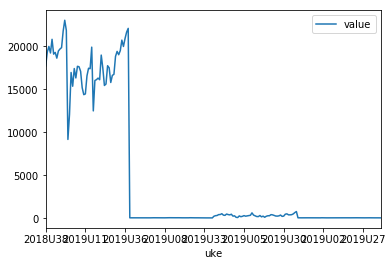

In [16]:
df.plot(x='uke', y='value')

lager en dataframe med bare priser (og ikke mengde/vekt)

In [17]:
df_pris = df[df['statistikkvariabel'] == 'Kilopris (kr)']


Det er to varegrupper fersk og frossen. Lager to plot med groupby 

varegruppe
Fersk oppalen laks     AxesSubplot(0.125,0.125;0.775x0.755)
Frosen oppalen laks    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

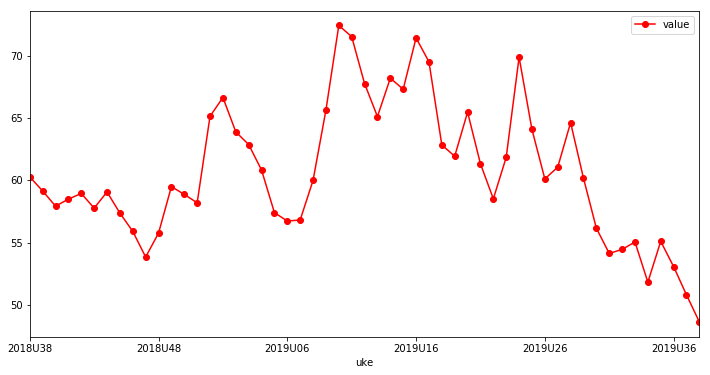

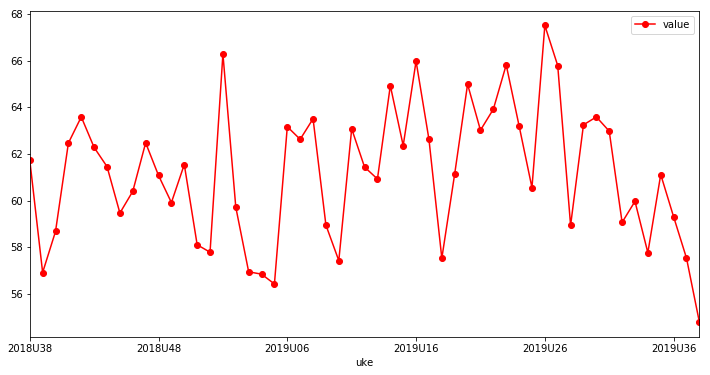

In [18]:
df_pris.groupby('varegruppe').plot(x='uke', y='value', marker="o", color="r", figsize=(12, 6))

Lager en dataframe med kun pris på fersk laks

In [19]:
df_fersk = df_pris[df_pris['varegruppe'] == 'Fersk oppalen laks']

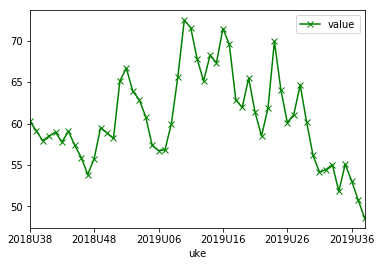

In [20]:
df_fersk.plot(x='uke', y='value', marker="x", color="g")